<a href="https://colab.research.google.com/github/lmendezayl/modelado-continuo/blob/main/trabajos-practicos/TP1IMC2025_MENDEZ_STANGALINI_DRELEWICZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2025 - Cátedra Mindlin
# **Trabajo Práctico 1**

Este es el trabajo práctico del 1er eje temático. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **martes 30 de septiembre, inclusive**. El trabajo es en **grupos de entre 2 y 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP1IMC2025_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte dinámica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.

---
# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.

1.1. Defina una función de Python que refleje los valores de la función sigmoidea en base a un valor de x, incluyendo la posibilidad de definir los parámetros como argumento de entrada. Considere por default los valores de parámetros para que el resultado sea la función $S(x)$.


In [31]:
def S(x, p=0, c=1):
    return 1 / (1 + np.exp(-(p + c*x)))



1.2. Estudie gráficamente la incidencia de los parámetros $\rho$ y $c$ en la forma funcional de la sigmoidea. Qué efecto tiene cada parámetro?


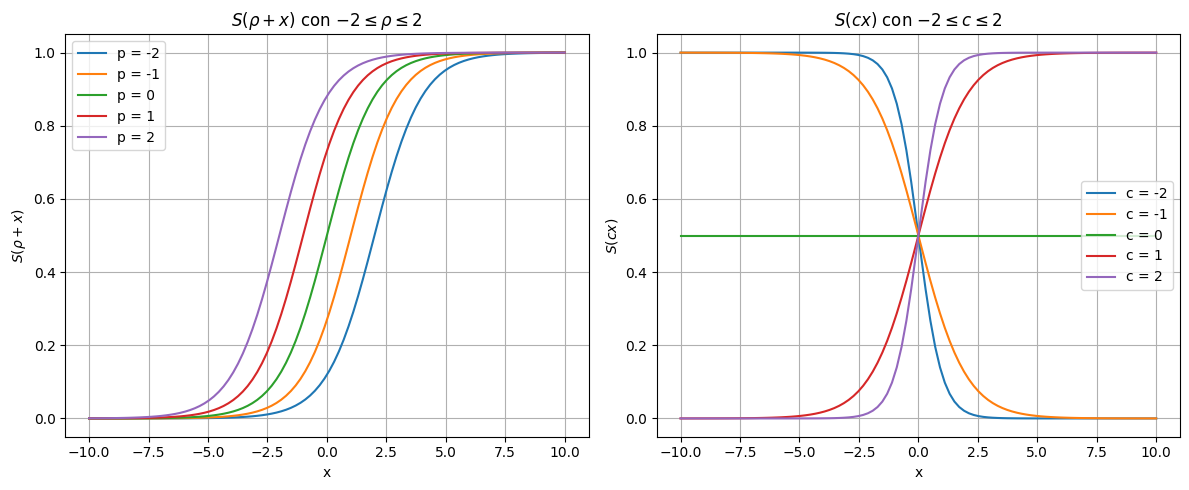

In [32]:
x = np.linspace(-10, 10, 100) # Dominio a graficar
p = np.arange(-2, 2+1, 1) # Valores de p
ci = np.arange(-2, 2+1, 1) # Valores c

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for pi in p:
    y = S(x, pi)
    axes[0].plot(x,y, label=f"p = {pi}")
axes[0].set_title("$S(\\rho + x)$ con $-2 \\leq \\rho \\leq 2$")
axes[0].grid()
axes[0].set_ylabel("$S(\\rho + x)$")
axes[0].set_xlabel("x")
axes[0].legend()

for x0 in ci:
    y = S(x, c=x0)
    axes[1].plot(x, y,label=f"c = {x0}")
axes[1].set_title("$S(cx)$ con $-2 \\leq c \\leq 2$")
axes[1].grid()
axes[1].set_ylabel("$S(cx)$")
axes[1].set_xlabel("x")
axes[1].legend()

plt.tight_layout()
plt.show()

El parámetro $\rho$ lo que hace es desplazar el gráfico de la función a la izquierda si $\rho > 0$, y a la derecha si $\rho < 0$.

El parámetro $c$ lo que hace es modificar como se comporta la transición de los límites de la función. 
El signo de $c$ determina de que límite a que límite de mueve, es decir:
- si $c > 0$, entonces $\lim_{x \rightarrow -\infty} = 0$ y $\lim_{x \rightarrow \infty} = 1$.
- si $c < 0$, entonces $\lim_{x \rightarrow -\infty} = 1$ y $\lim_{x \rightarrow \infty} = 0$. 
- si $c = 0$, entonces $\lim_{x \rightarrow -\infty} = \lim_{x \rightarrow \infty} = 0.5$, y de hecho, la función es la constante $0.5$

Además si $c$ crece en módulo, la rapidez de transición entre límites aumenta; mientras que si decrece la rapidez disminuye.


1.3. Estudie gráficamente la posibilidad de existencia de puntos fijos del sistema para $c=10$.


Para estudiar la existencia de puntos fijos planteamos la anulación del campo vector

$$ f(x^*) = -x^* + S(\rho + 10x^*) = 0 \; ⟺ x^* = S(\rho + 10x^*)$$

Es decir que debemos hallar las posibles intersecciones entre la recta identidad y la sigmoidea.

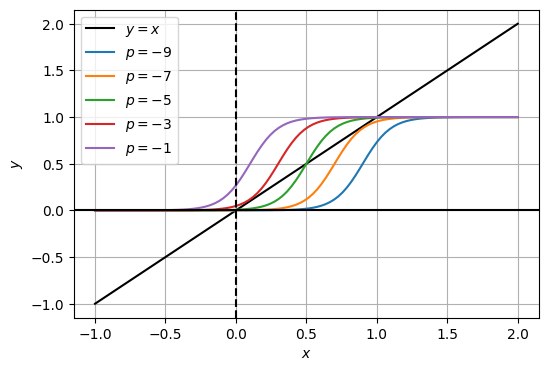

In [33]:
p =[-9, -7, -5, -3, -1]

x = np.linspace(-1, 2, 100)

plt.figure(figsize=(6, 4))
plt.plot(x, x, color='k', label="$y=x$")

for pi in p:
    plt.plot(x, S(x, p=pi, c=10), label=f"$p = {pi}$")
    
plt.axvline(x=0, color='k', linestyle="--")
plt.axhline(y=0, color='k')

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.legend()
plt.grid()
plt.show()

Con estas elecciones de $\rho$, se observa que el sistema tiene puede tener 1, 2 o 3 puntos fijos.

- En particular para valores $\rho ≈ -7, -3$ vemos que las curvas se intersectan en 2 puntos.
- Para $\rho < -7$, tenemos un solo punto al cual lo podemos aproximar por $x^* ≈ 0$, dado que tenemos un valor alto de c, por lo que la caida de la sigmoidea a 0 se da muy rapidamente.
- Para $\rho > -3$ también tenemos un solo punto fijo que, por el mismo motivo de antes, lo podemos aproximar por $x^* ≈ 1$.
- En el medio de estos valores, $-7 < \rho < -3$, tenemos la presencia de 3 puntos fijos

Ahora graficamos el campo completo

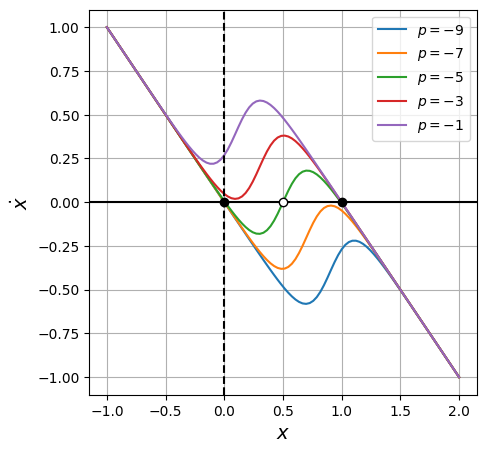

In [34]:
# Definimos el sistema
def f(x, p):
    return -x + S(x, p=p, c=10)

x = np.linspace(-1, 2, 100)
p =[-9, -7, -5, -3, -1]

plt.figure(figsize=(5, 5))
for pi in p:
    plt.plot(x, f(x, pi), label=f"$p = {pi}$")
    
plt.axvline(x=0, color='k', linestyle="--")
plt.axhline(y=0, color='k')

plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$\dot x$", fontsize=14)

plt.plot(1, 0, marker='o', color="black")
plt.plot(0, 0, marker='o', color="black")
plt.plot(0.5, 0, marker='o', markerfacecolor="w", markeredgecolor='k')

plt.legend()
plt.grid()

Vemos, cómo esperabamos, que los valores de los puntos fijos de los extremos, para valores de $\rho$ alejados del rango mencionado,  tienden asíntoticamente a 0 y 1. Además notamos que son estables dado que la derivada del campo en ellos es negativa; por el contrario, cuando hay 3 puntos fijos el del centro es inestable.


1.4. Usando las herramientas numéricas, busque los puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encontradas si los hubiese, como por ejemplo, pedir que el campo vector evaluado en la raíz sea menor a una cierta cota tolerada. Analice su estabilidad a partir de la derivada numérica. Haga un diagrama de bifurcaciones para los valores de $\rho$ elegidos. Qué tipo de bifurcaciones encuentra?


Primero definimos una funcion para encontrar las raices mediante el metodo de la secante dados $f$ campo vector, $x$ intervalo de busqueda.

In [35]:
def root_finder(f, x0, args, fprime=None, N=100, eps=1e-8, seed=42):
    if seed is not None:
        np.random.seed(seed)
        
    condiciones_iniciales = np.random.choice(x0, size=N)
    soluciones = []
    
    for ci in condiciones_iniciales:
        try:
            sol = sp.optimize.newton(f, x0=ci, fprime=fprime, tol=eps, maxiter=200, args=args, disp=False)
            soluciones.append(sol)
        except RuntimeError:
            pass 
        
    return np.unique(np.array(soluciones).round(3))

Ahora buscamos las raices para distintos valores de $\rho$, elegidos en base al ejercicio anterior:
- Sabemos que para $\rho = -9$, la cantidad de puntos fijos es 1, y para $\rho = -1$ tambien es solo un punto fijo, como vimos anteriormente.

Notar que no va ser posible encontrar analíticamente el valor de $\rho$ donde la cantidad de puntos fijos es dos de manera analítica, ya que solo hay 2 valores de $\rho$ donde eso sucede, y solo encontraremos una aproximacion gráfica.

In [36]:
def derivar(f, x0, args, method='central', h=0.01):
  f_aux = lambda x: f(x, *args)
  match method:
      case 'forward':
          return (f_aux(x0 + h) - f_aux(x0))/h
      case 'backward':
          return (f_aux(x0) - f_aux(x0 - h))/h
      case 'central':
          return (f_aux(x0 + h) - f_aux(x0 - h))/(2*h)
      case _:
          raise ValueError("El método debe ser 'forward', 'backward' o 'central'")

C:\Users\lmend\AppData\Local\Temp\ipykernel_14204\4109094296.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(p + c*x)))


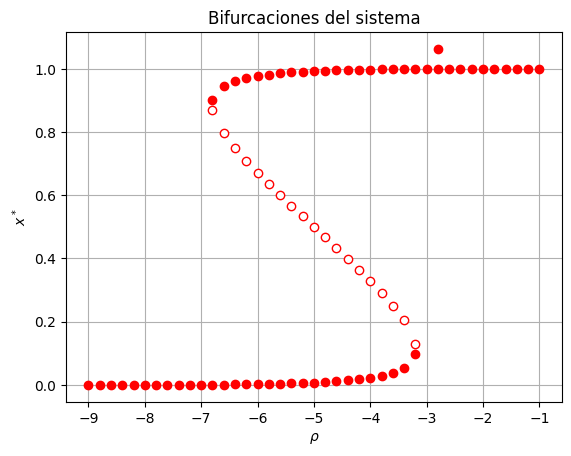

In [37]:
x0s = np.arange(0, 1, 0.01)
p = np.linspace(-9, -1, 41)

# Iteramos sobre los valores de rho
for pi in p:
    raices = root_finder(f, x0s, args=(pi,))
    for raiz in raices:
        # Usamos la derivada númerica para calcular la pendiente del campo en el punto fijo
        pend = derivar(f, raiz, args=(pi,))
        # Graficamos las raices
        plt.plot(pi, raiz, 'o',
                 markerfacecolor=('w', 'r')[int(pend < 0)],
                 markeredgecolor='r')

plt.xlabel(r"$\rho$")
plt.ylabel(r"$x^*$")
# plt.axvline(x=-7, color='g', linestyle="--", ymin=0, ymax=1)
# plt.axvline(x=-3, color='g', linestyle="--", ymin=0, ymax=1)
plt.title("Bifurcaciones del sistema")
plt.grid()
plt.show()


1.5. Considerando que las bifurcaciones separan regiones que definen comportamientos del sistema cualitativamente distintos. Para c=10, elija un valor de $\rho$ dentro de cada una de esas regiones como caso representativo de la dinámica asociada. Tengan en cuenta que no es necesario que busquen exactamente dónde están las bifurcaciones, con elegir valores de $\rho$ que me caractericen cada región y su dinámica ya es suficiente. Para cada uno de estos valores de $\rho$, estudie distintas soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales. Cómo interpreta las trayectorias encontradas y cómo las relaciona con los resultados previos?


In [38]:
# Método de Euler
def odeEuler(f, x0, t_span, args=(), dt=0.1):
    t0, tf = t_span[0], t_span[1]
    t = np.arange(t0, tf+dt, step=dt)
    x = np.zeros_like(t)
    x[0] = x0
    for i in range(len(t)-1):
        x[i+1] = x[i] + dt*f(x[i], *args)
    return t, x

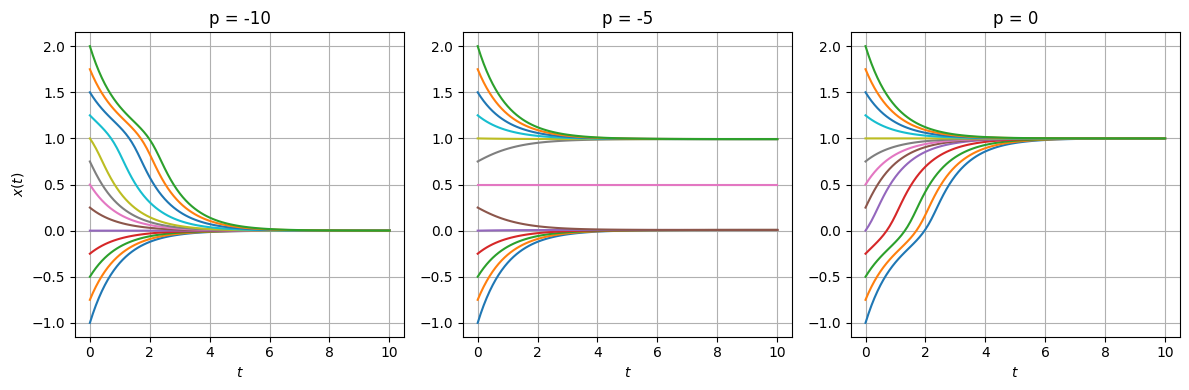

In [39]:
# Integramos el sistema para distintas conds. iniciales y diferentes valores de p
p = [-10, -5, 0]
ci = np.arange(-1, 2+0.25, step=0.25)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(len(p)):
    for x0 in ci:
        t, x = odeEuler(f, x0, t_span=(0, 10), args=(p[i],))
        axes[i].plot(t, x)
    axes[i].set_title(f"p = {p[i]}")
    axes[i].set_xlabel("$t$")
    axes[i].grid()
axes[0].set_ylabel("$x(t)$")
plt.tight_layout()

En la figura se muestran las soluciones $x(t)$ obtenidas mediante integración numérica con el método de Euler, para distintos valores del parámetro $\rho$ y diversas condiciones iniciales:

- **Caso $\rho =-10$:**  
  En este caso el sistema presenta un único punto fijo estable cercano a $x=0$. Todas las trayectorias convergen hacia él independientemente de la condición inicial, lo que refleja un comportamiento estable, consistente con el análisis para $\rho < -7$.

- **Caso $\rho = -5$ :**  
  En este valor de $\rho$ aparecen tres puntos fijos: dos estables (cerca de $x=0$ y de $x=1$) y uno inestable intermedio. El punto inestable actúa como separatriz: según la condición inicial, el sistema evoluciona hacia uno u otro de los atractores.  Esto evidencia un régimen claramente inestable.

- **Caso $\rho = 0$:**  
  Aquí el sistema vuelve a tener un único punto fijo estable, desplazado a un valor positivo de x. Todas las trayectorias convergen hacia él, reflejando el carácter estable (en este caso para $\rho > -3$).

En conclusión, los resultados numéricos verifican el análisis cualitativo:
el sistema es monostable lejos de la región de bifurcación y se vuelve bistable
en el intervalo $-7 < \rho < -3$, donde coexisten dos atractores separados por un punto inestable.


1.6. Usando la estrategia de integrar hacia atrás, muestre que las trayectorias obtenidas efectivamente se comportan de la manera esperada para algún punto fijo inestable del sistema, reforzando los resultados de los sub-ejercicios previos. Como consejo, piensen en las condiciones iniciales que utilizan.


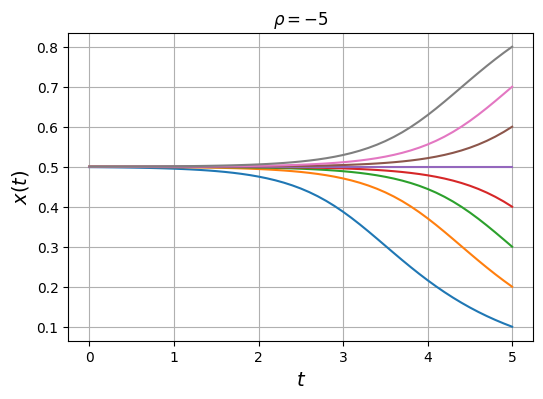

In [40]:
p = -5
dt = -0.1
tmax = 5
ci = np.arange(0.1, 0.9, step=0.1)
plt.figure(figsize=(6, 4))
for x0 in ci:
    t, x = odeEuler(f, x0, t_span=(tmax, 0) , args=(p, ), dt=dt)
    plt.plot(t, x)
plt.title(r"$\rho = {}$".format(p))
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$x(t)$", fontsize=14)
plt.grid()
plt.show()

En la Figura se observa que, al integrar hacia atrás con
$\rho=−5$, las trayectorias que parten de condiciones iniciales distintas no convergen hacia un mismo valor, sino que se separan progresivamente en torno al punto $𝑥≈0.5$. Este comportamiento evidencia que dicho punto fijo es inestable, ya que pequeñas diferencias en la condición inicial se amplifican con el tiempo, alejando las soluciones del equilibrio. De esta manera, el gráfico refuerza el análisis teórico previo y muestra que el sistema no presenta un atractor estable en esa región de parámetros.

---
# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

2.1. Defina el sistema con una función de Python.


In [41]:
def F(t, z):
    x, y = z
    return [-x - x**2 - y, x - y] # [dx, dy]



2.2. Busque puntos fijos a partir del estudio gráfico de las nulclinas. Para el gráfico de las nulclinas use `plt.contour` para levels=[0].


Definimos el intervalo $-4 \leq x,y \leq 4$ donde evaluaremos nuestro campo vector $f$.

In [42]:
X, Y = np.meshgrid(np.arange(-4, 4, .01), np.arange(-4, 4, .01))
DFx, DFy = F(0, [X, Y]) # t=0

Usamos `coutour` para plotear las nulclinas.

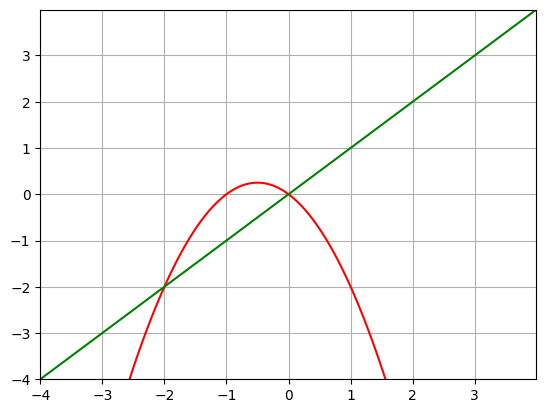

In [43]:
plt.contour(X, Y, DFx, levels=[0], colors=['r'])
plt.contour(X, Y, DFy, levels=[0], colors=['g'])
plt.grid() # Nos facilita la vida

Gracias a la grilla, podemos determinar que los puntos fijos deberian ser $(0,0)$ y el otro $(-2,-2)$. Veamoslo con un gráfico extra:

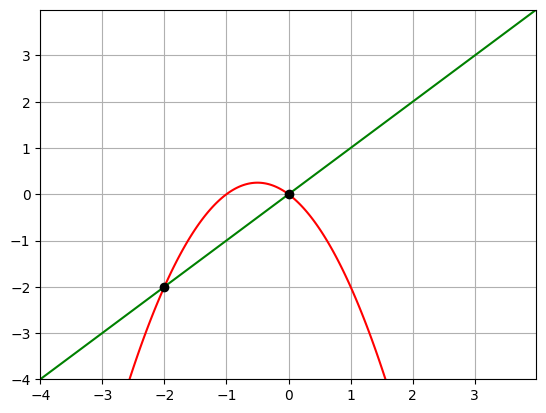

In [44]:
plt.contour(X, Y, DFx, levels=[0], colors=['r'])
plt.contour(X, Y, DFy, levels=[0], colors=['g'])
plt.grid()

# Puntos fijos?
plt.plot(0,0, marker='o', color="black")
plt.plot(-2,-2, marker='o', color="black")


2.3. Busque numéricamente los puntos fijos con `fsolve` de Scipy.


Veamos que raices nos retornó el algortimo:

In [45]:
def F_0(z):
    return F(0, z)

x0s = [-3, -1, 1]
y0s = [-3, -1, 1]
soluciones = []
for x0 in x0s:
    for y0 in y0s:
        z0 = [x0, y0]
        soluciones.append(sp.optimize.fsolve(F_0, z0))
puntos_fijos = np.unique(np.array(soluciones).round(2), axis=0)
puntos_fijos

array([[-2., -2.],
       [ 0.,  0.]])

Como habíamos pensado, los puntos fijos son correctos.


2.4. Defina una función de Python genérica que tenga la matriz Jacobiana en función de valores de "x" e "y". Evalúe la matriz en los puntos fijos y estudie su estabilidad. Qué tipo de puntos fijos son?


Basicamente nos piden linealizar el sistema en un entorno
 de los puntos fijos. Primero armamos el jacobiano del sistema, y renombrando nuestras ecuaciones $\dot{x} = f_1(x, y)$ y $\dot{y} = f_2(x, y)$ tenemos que:

$$
J(x, y) = \begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{pmatrix}
 = \begin{pmatrix}
-1 - 2x & -1 \\
1 & -1
\end{pmatrix}
$$

Implementamos eso mismo:

In [46]:
def Jacobiano(z): # Usamos z para poder usar la variable raiz
    x, y = z
    return np.array([[-1 - 2*x, -1],
                     [   1    , -1]])

Ahora evaluamos sobre cada punto fijo, y obtenemos los autovalores y autovectores para evaluar su estabilidad, y definir el tipo de punto fijo que son. Primero veamoslo detalladamente para el punto fijo $(0,0)$:

In [47]:
J_0 = Jacobiano([0,0])
print(J_0)

[[-1 -1]
 [ 1 -1]]


Buscamos autovectores y autovalores:

In [48]:
avals_0, avecs_0 = np.linalg.eig(J_0)
avals_0, avecs_0

(array([-1.+1.j, -1.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

Nuestros autovalores son $\lambda_{\pm} = - 1 \pm i$, con autovectores (normalizados) $\vec{v_+} = \frac{1}{\sqrt{2}}(1, -i) \; $ y $ \; \vec{v_-} = \frac{1}{\sqrt{2}}(1, i)$ respectivamente.

Como $\mathbb{Re}(\lambda_{\pm}) < 0$, el punto fijo $(0, 0)$ es un punto estable, entonces es un ***foco atractor***.

Repitamos el proceso para el otro punto fijo, $(-2,-2)$ sin frenarnos en detalles:

In [49]:
J_2 = Jacobiano([-2,-2])
avals_2, avecs_2 = np.linalg.eig(J_2)
avals_2, avecs_2

(array([ 2.73205081, -0.73205081]),
 array([[0.96592583, 0.25881905],
        [0.25881905, 0.96592583]]))

Ahora, los autovalores son reales, positivo y negativo. Entonces, debe ser un punto fijo tipo ***saddle node***.


2.5. Grafique el campo vector usando `plt.streamplots`. Interprete las líneas de campo obtenidas en referencia al item anterior.


Usando el mismo intervalo para $x$ e $y$ que en puntos anteriores, ploteamos el flujo del sistema:

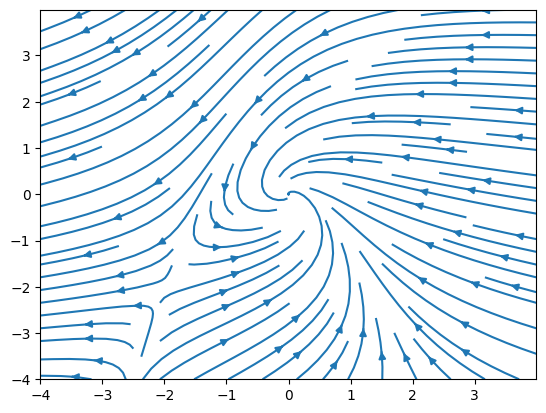

In [50]:
plt.streamplot(X, Y, DFx, DFy, density=1, minlength=.1)

Se entiende, pero podria ser más claro aún. Probemos con una densidad mayor de flujo:

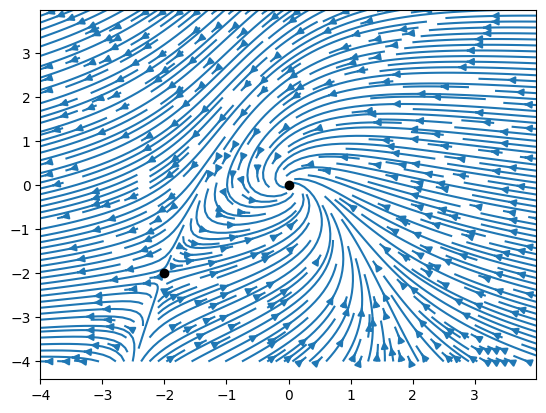

In [51]:
plt.streamplot(X, Y, DFx, DFy, density=2, minlength=0.01) # Cambiamos density a 2, minlenght a 0.01
plt.plot(0,0, marker='o', color="black")
plt.plot(-2,-2, marker='o', color="black")

Este grafico es mil veces más visual e interesante. Inclusive podemos ver como se forman los patrones alrededor de los puntos fijos, un saddle node en $(-2,-2)$ y un foco atractor en $(0,0)$, ¡tal como verificamos con los autovalores en el punto anterior! Veamos un ultimo grafico, para verificar que las matemáticas funcionan, y que las nulclinas delimitan sectores del campo vector:

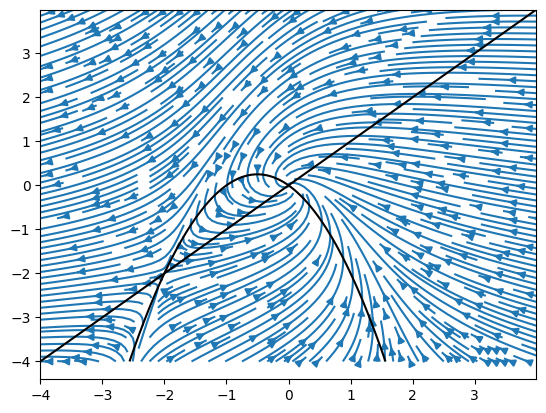

In [52]:
plt.streamplot(X, Y, DFx, DFy, density=2, minlength=0.01)

# Agregamos nulclinas
plt.contour(X, Y, DFx, levels=[0], colors=['black'])
plt.contour(X, Y, DFy, levels=[0], colors=['black'])

Un último gráfico, mostrando con calor las velocidades de las trayectorias en su posicion.

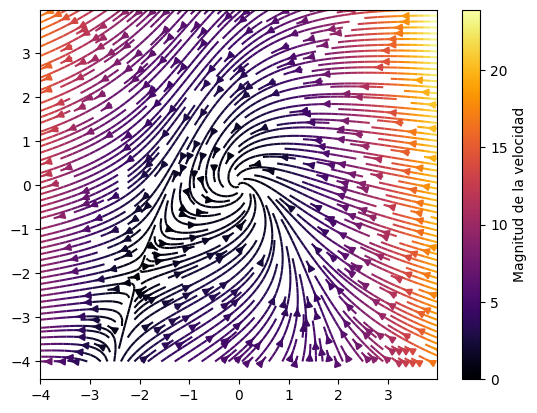

In [53]:
# Definimos vector de velocidad
v = np.sqrt(DFx**2 + DFy**2)

strm = plt.streamplot(X, Y, DFx, DFy, color=v, cmap='inferno', density=2, minlength=0.01)
plt.colorbar(strm.lines, label="Magnitud de la velocidad")

Notar que a más cerca estan de los puntos fijos, la velocidad es menor.


2.6. Encuentre trayectorias en el espacio de fases que describan comportamientos del sistema. Para esto resuelva el sistema, usando `solve_ivp`. Use pasos largos, tiempos de integración muy cortos. Elija estos valores y las condiciones iniciales criteriosamente, de manera tal de reforzar los resultados previos, mostrando qué tipos de elementos dinámicos presenta el sistema en base a sus observaciones.

Definimos una funcion para calcular las variedades globales dado un punto fijo.

In [54]:
def variedad_global(F, z_fijo, variedad_local, eps=1e-3, T_forward=10, T_backward=10):
    avals, avecs = variedad_local[0], variedad_local[1]
    variedades_globales = []  # guardaremos variedades globales para plotear

    # Determinar cuál es estable e inestable por signo parte real
    ind_estable = np.where(np.real(avals) < 0)[0]
    ind_inestable = np.where(np.real(avals) > 0)[0]

    # Para cada autovector, integrar en las direcciones +/-
    for i in range(avals.size):
        v = np.real(avecs[:, i])

        variedad_global = []

        # dos direcciones (hacia +v y -v)
        for sign in [+1, -1]:
            z0 = z_fijo + sign*eps*v

            # si el autovalor es inestable (parte real positiva) integramos hacia adelante (0 -> T_forward)
            if np.real(avals[i]) > 0:
                sol_variedad = sp.integrate.solve_ivp(F, (0.0, T_forward), z0, atol=1e-9, rtol=1e-8, max_step=0.1)

            # si estable (parte real negativa) integramos hacia atrás (0 -> -T_backward)
            else:
                sol_variedad = sp.integrate.solve_ivp(F, (0.0, -T_backward), z0, atol=1e-9, rtol=1e-8, max_step=0.1)

            variedad_global.append(sol_variedad.y)

        variedades_globales.append(variedad_global)

    return variedades_globales

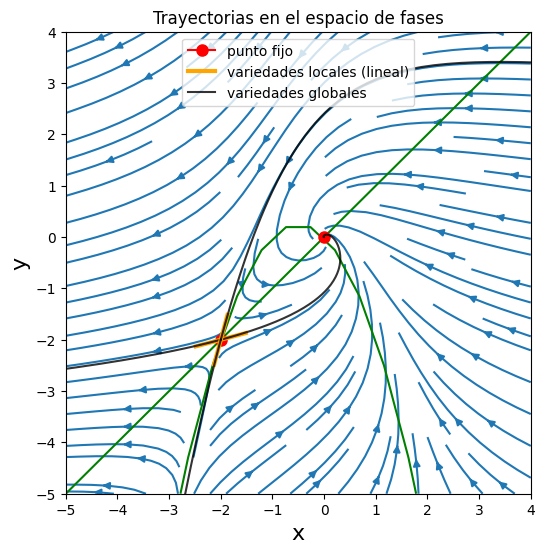

In [55]:
variedad_global_2 = variedad_global(F, [-2, -2], (avals_2, avecs_2), T_forward=20, T_backward=20)

# Graficar campo vector
XX, YY = np.meshgrid(np.linspace(-5, 4, 20), np.linspace(-5, 4, 20))
DX, DY = F(0, [XX, YY])
plt.figure(figsize=(6,6))
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.1)

# Graficamos las nullclinas
plt.contour(XX, YY, DX, levels=[0], colors=['green'])
plt.contour(XX, YY, DY, levels=[0], colors=['green'])

for pto_fijo in puntos_fijos:
    # Plot punto fijo
    plt.plot(*pto_fijo, color='r', marker='o', markersize=8, label='punto fijo')

escala_local = 0.5
for i in range(avals_2.size):
    # Dibujamos autovectores locales (líneas rectas) a pequeña escala
    v = np.real(avecs_2[:, i])
    pts = np.array([-2 - escala_local*v, -2 + escala_local*v]).T
    plt.plot(pts[0], pts[1], color='orange', linewidth=3, label='variedades locales (lineal)')

    # Dibujamos las trayectorias integradas (variedades globales aproximadas)
    for tray in variedad_global_2[i]:
        plt.plot(tray[0], tray[1], 'k', alpha=0.8, label='variedades globales')

plt.xlim(XX[0][0], XX[-1][-1])
plt.ylim(YY[0][0], YY[-1][-1])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title("Trayectorias en el espacio de fases")
# plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

A partir de este gráfico vemos que basicamente hay 2 zonas importantes para la dinamica de este sistema: una por arriba de la curva correspondiente variedad global atractora relacionadae al autovector más vertical del nodo saddle y la otra por debajo de esta. Arriba de ella todas las trayectorias divergen hacia los x negativos mientras que para condiciones inciales por debajo de esta, las trayectorias van a converger al foco atractor.

---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

3.1. Considerar que la población de $N = 10000$ habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. [Hint: considere que todas las personas que no están enfermas son susceptibles].

Al inicio todos (menos 1) son suceptibles asi que comienza en 10000 y luego con el pasar de los días debería empezar a disminuir debido a que sube la cantidad de infectados que comienza en 1 persona. Como sube la cantidad de infectados comenzará a subir los recuperados que inicialmente son 0. Cada grupo seguirá esta tendencia hasta el punto donde no haya muchos suceptibles como para poder transmitirse la infección. Por esta razón, en tal punto la cantidad infectados deberá comenzar a disminuir hasta que finalmente los infectados son 0.

3.2. Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.

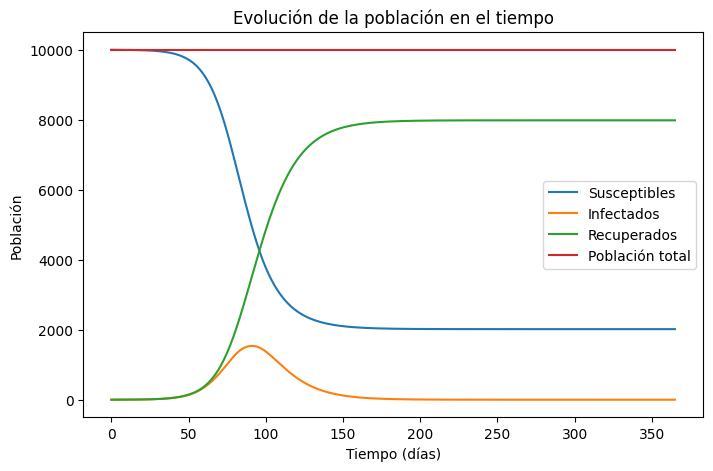

In [56]:
def sir(t, P, b=0.2, g=0.1):
    S, I, R = P 
    N = S + I + R # total de habitantes
    return [-b*S*I/N,
            b*S*I/N - g*I,
            g*I]

# Parámetros
N = 10000
S0, I0, R0 = N-1, 1, 0 # condiciones iniciales
P0 = [S0, I0, R0]
dt = 1 # datos por dia
tmax = 365 # simulamos un año
t = np.arange(0, tmax+dt, step=dt)

# Resolución
sol = sp.integrate.solve_ivp(sir, (0, tmax), P0, t_eval=t )
P = sol.y # solve_ivp() retorna objeto con 
S, I, R = P[0,:], P[1,:], P[2,:]
T = S + I + R

plt.figure(figsize=(8, 5))

plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.plot(t, T, label="Población total")

plt.xlabel("Tiempo (días)")
plt.ylabel("Población")
plt.title("Evolución de la población en el tiempo")
plt.legend()

plt.show()


3.3. Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones llega a su máximo y comienza a descender (encontrar numéricamente, no "a ojo"). Mostrar cuál sería ese momento en la curva de I(t).

---

Para determinar el máximo usamos el metodo `sp.signal.find_peaks()` sobre el conjunto de infectados.

In [57]:
max = sp.signal.find_peaks(I)[0][0]

Graficamos la evolucion de la población junto con el máximo de infectados:

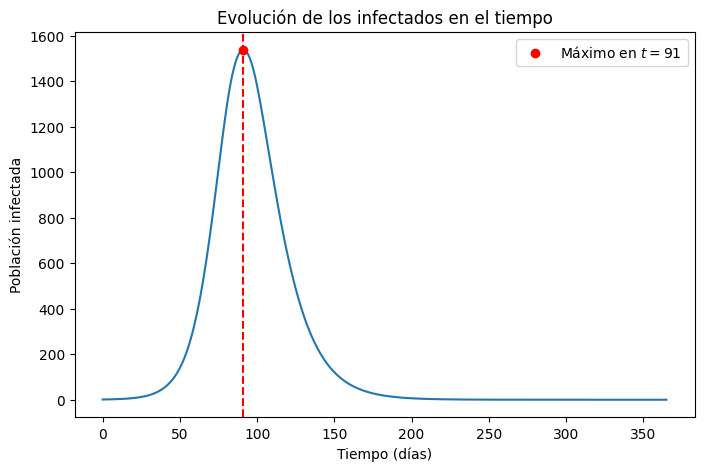

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(t, I)
plt.axvline(x=t[max], color='r', linestyle="--")
plt.plot(t[max], I[max], "o", label=f"Máximo en $t={max}$", color="red")
plt.xlabel("Tiempo (días)")
plt.ylabel("Población infectada")
plt.title("Evolución de los infectados en el tiempo")
plt.legend()